In [47]:
import urllib2
import json
import matplotlib.pyplot as plt
import numpy as np

api_key = 'XXX'

In [9]:
channel_id = 'UCMtFAi84ehTSYSE9XoHefig'
video_results_url = "https://www.googleapis.com/youtube/v3/search?part=snippet&channelId=%s&maxResults=40&order=date&type=video&key=%s"
yt_results = json.loads(urllib2.urlopen(video_results_url % (channel_id, api_key)).read())

In [17]:
stats_url = "https://www.googleapis.com/youtube/v3/videos?part=contentDetails,statistics&id=%s&key=%s"
video_ids = [item['id']['videoId'] for item in yt_results['items']]
full_url = stats_url % (','.join(video_ids), api_key)
yt_stats = json.loads(urllib2.urlopen(full_url).read())

In [25]:
results = {}
for item in yt_results['items']:
    results[item['id']['videoId']] = [item['snippet']['title'], item['snippet']['description']]

for item in yt_stats['items']:
    results[item['id']].append(item['statistics']['viewCount'])

In [26]:
for key in results:
    print key, results[key][0], results[key][2]

NyHCIhFsZoA Paula Poundstone: Extended Interview 87945
lnepE8yoKsw The GOP Congressman Waging A War On Ducklings 528965
TUq5LhGV0VM Gina Rodriguez Is Playing Another Virgin: Mary 273987
Y8wfaTYag90 Brad Pitt: Big Questions With Even Bigger Stars 1242085
NZJfIyxz3UY Ricky Gervais And Stephen Disagree On 'Lord Of The Rings' 873686
NGcmRkcjckA Timothy Simons Has Endured A Lot From The 'Veep' Writers 135425
oSvq6NYomms Trump Packs A Suitcase For His First Foreign Trip 391843
DOiQ8toIFis The xx Performs 'I Dare You' 93137
Q2HxgpAZtjk Danny McBride Had A Paranormal Encounter 220229
WkrhVAViL-E David Ortiz Spoke From The Heart After The Boston Marathon Bombing 75371
VdLh0lW2v00 Demetri Martin Shares His Early Comedy Drawings 136696
82h71ko0PDE The Other Classified Secrets Trump Bragged About 245784
Ye9Ard5P0oY Metallica Performs 'Now That We're Dead' 205770
GMHW6XEO1ms Tuck Buckford Willingly Issues A Forced Apology 677845
pmd6Le63W3k Breaking: Trump And Bannon's High-Speed Getaway 469626
8XP

In [27]:
tcount = 0
ttotal = 0
fcount = 0
ftotal = 0
words = ['Trump', 'GOP', 'Spicer', 'Comey', 'White House']
for key in results:
    present = False
    for word in words:
        if word in results[key][0] or word in results[key][1]:
            present = True
            break
    if present:
        tcount += 1
        ttotal += int(results[key][2])
    else:
        fcount += 1
        ftotal += int(results[key][2])

print tcount, ttotal, ttotal/tcount
print fcount, ftotal, ftotal/fcount

20 21801176 1090058
20 6220100 311005


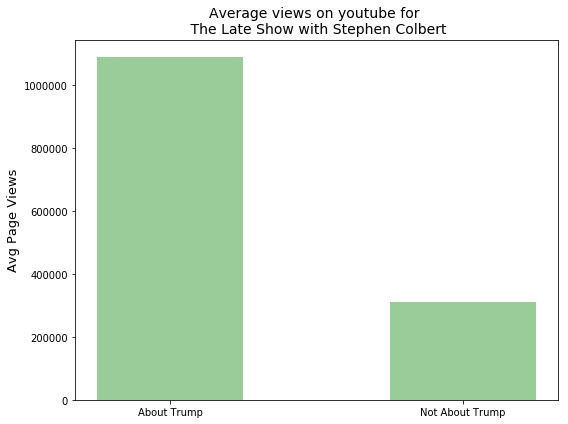

In [64]:
plt.rcParams["figure.figsize"] = (8,6)

counts = (tcount, fcount)

avg_views = (ttotal/tcount, ftotal/fcount)

fig, ax = plt.subplots()

index = np.arange(2)
bar_width = 0.5

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, avg_views, bar_width,
                 alpha=opacity,
                 color='g')

plt.ylabel('Avg Page Views', fontsize=13)
plt.title('Average views on youtube for \n The Late Show with Stephen Colbert', fontsize=14)
plt.xticks(index +  0/ 2, ('About Trump', 'Not About Trump',))

plt.tight_layout()
plt.show()